# Chapter 3 Exercises

## Set Up

In [1]:
# imports
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

## Problem 8

This question involves the use of simple linear regression on the Auto
data set.

### Part a
Use the sm.OLS() function to perform a simple linear regression
with mpg as the response and horsepower as the predictor. Use
the summarize() function to print the results. Comment on the
output. For example:
1.   Is there a relationship between the predictor and the response?
2.   How strong is the relationship between the predictor and
the response?
3.   Is the relationship between the predictor and the response
positive or negative?
4.   What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confdence and prediction
intervals?

In [2]:
Auto = load_data("Auto")
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [3]:
X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]),
                  'horsepower': Auto['horsepower']})
X[:4]

,intercept,horsepower
0,1.0,130
1,1.0,165
2,1.0,150
3,1.0,150


In [4]:
y = Auto['mpg']
model = sm.OLS(y, X)
results = model.fit()

In [5]:
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [6]:
design = MS(['horsepower'])
design = design.fit(Auto)
new_df = pd.DataFrame({'horsepower':[98]})
newX = design.transform(new_df)
newX

,intercept,horsepower
0,1.0,98


In [7]:
new_prediction = results.get_prediction(newX)
new_prediction.predicted_mean

array([24.46707715])

In [8]:
#95% confidence interval
new_prediction.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [9]:
39.9359	+ -0.1578*98

24.4715

In [10]:
#prediction interval - wider?
new_prediction.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

### Part b
Plot the response and the predictor in a new set of axes ax. Use
the ax.axline() method or the abline() function defined in the
lab to display the least squares regression line.

In [11]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

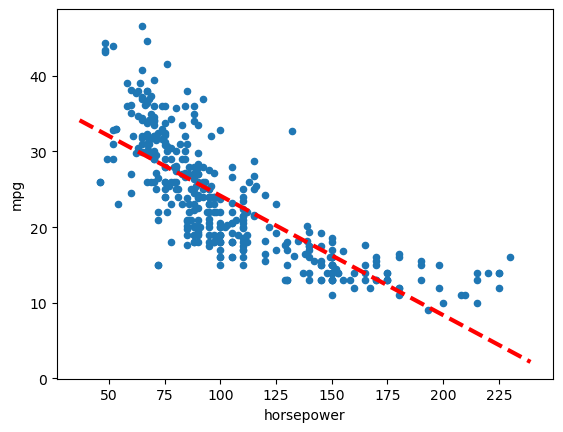

In [12]:
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

### Part c
Produce some of diagnostic plots of the least squares regression
fit as described in the lab. Comment on any problems you see
with the fit.

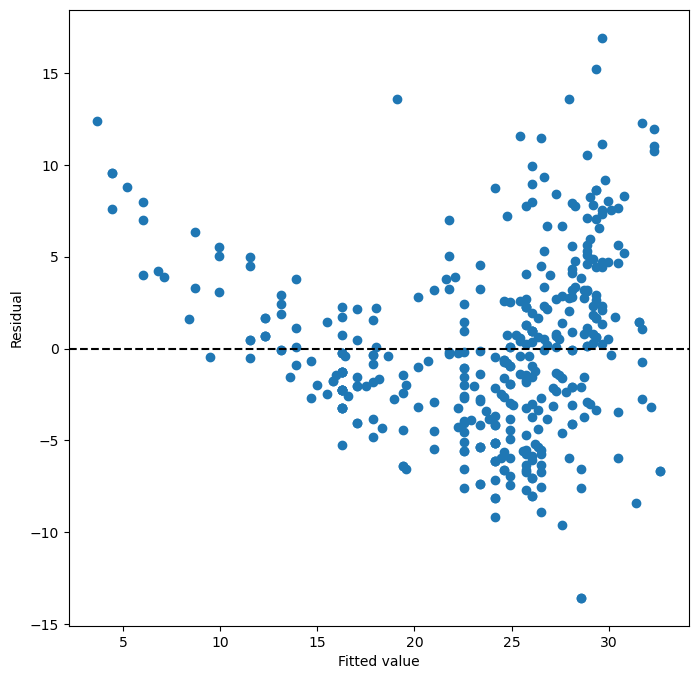

In [13]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

115

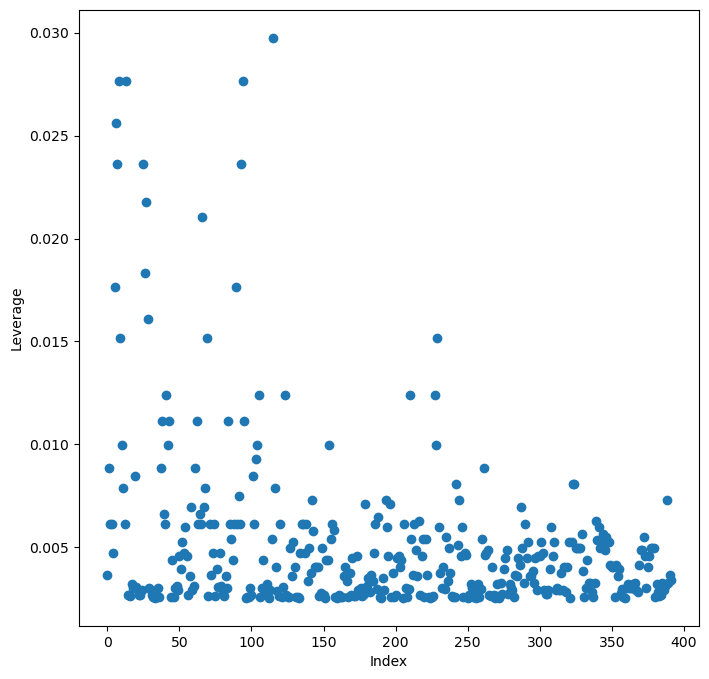

In [14]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

## Problem 9

This question involves the use of multiple linear regression on the
Auto data set.

### Part a
Produce a scatterplot matrix which includes all of the variables
in the data set.

We already have the data loaded into Auto, we can use this to create the scatterplot matrix:

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

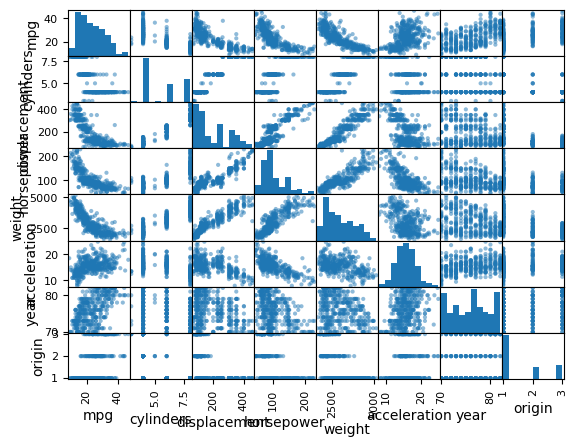

In [15]:
pd.plotting.scatter_matrix(Auto)

### Part b
Compute the matrix of correlations between the variables using
the DataFrame.corr() method.

In [16]:
Auto.corr()

C:\Users\swell\AppData\Local\Temp\ipykernel_6520\340684133.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### Part c
Use the sm.OLS() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summarize() function to print the results.
Comment on the output. For instance:
1.  Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to
answer this question.
2.  Which predictors appear to have a statistically signifcant
relationship to the response?
3.  What does the coefcient for the year variable suggest?

In [17]:
minus_name = Auto.columns.drop(['mpg', 'name']) 
Xmn = MS(minus_name).fit_transform(Auto)
model1 = sm.OLS(y, Xmn)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


We can compare this result to our simpler model that used only horsepower as a predictor by using `anova_lm()`.

In [18]:
anova_lm(results, results1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63


1.  The `anova_lm()` function performs a hypothesis test
comparing the two models. The null hypothesis is that the
terms in the bigger model are not needed, and the alternative hypothesis is that the
bigger model is superior. Here the *F*-statistic is 77.27 and
the associated *p*-value is zero.
This provides very clear evidence that the bigger model improves the smaller model that used only `horsepower`.

2.  Based on the p-values, there appears to be a statistically significant relationship between mpg and the predictors displacement, weight, year, and origin. 

3.  The coefficient of `0.75` for the year variable suggests there is a positive relationship between `year` and `mpg` and with all other variables held constant, `mpg` would increase about `0.75` every year.

### Part d
Produce some of diagnostic plots of the linear regression fit as
described in the lab. Comment on any problems you see with the
fit. Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually
high leverage?

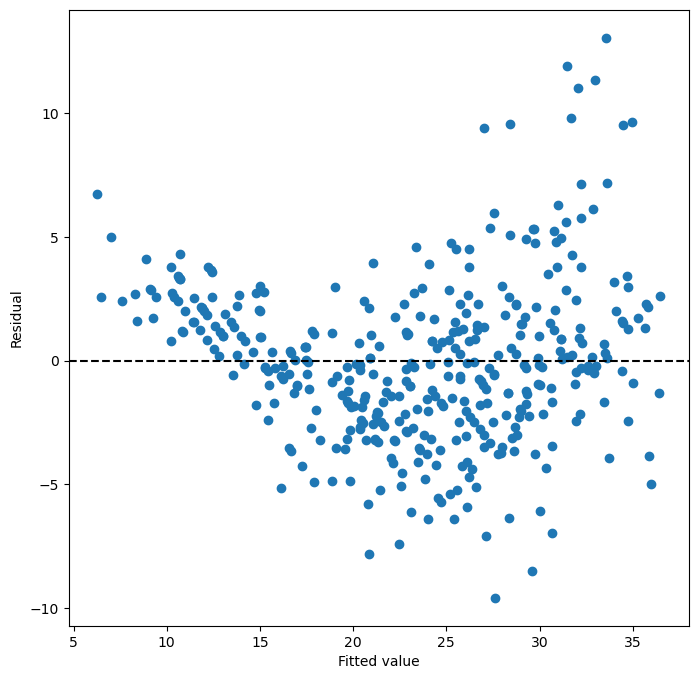

In [19]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results1.fittedvalues, results1.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

There are high positive residuals then negative and then positive again, this might suggest outliers or needing a different model - perhaps including quadratic terms.

13

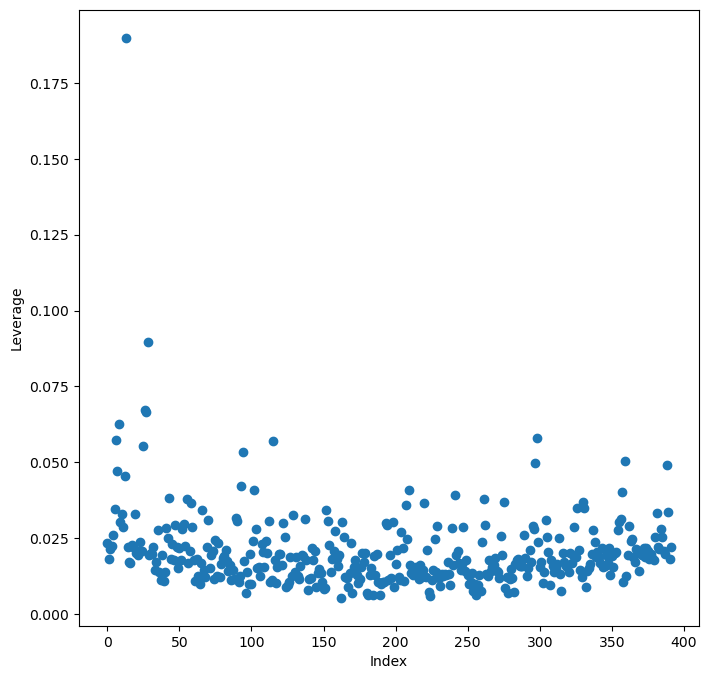

In [20]:
infl = results1.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

There is one observation with very high leverage that is having undue influence on the model.

### Part e
Fit some models with interactions as described in the lab. Do
any interactions appear to be statistically significant?

In [21]:
X = MS(['weight',
        'acceleration',
        ('weight', 'acceleration')]).fit_transform(Auto)
model2 = sm.OLS(y, X)
results2 = model2.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,28.1398,4.872000,5.776,0.000
weight,-0.0032,0.001000,-2.168,0.031
acceleration,1.1174,0.310000,3.608,0.000
weight:acceleration,-0.0003,0.000097,-2.875,0.004


In [22]:
X = MS(['horsepower',
        'year',
        ('horsepower', 'year')]).fit_transform(Auto)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,-126.6089,12.117,-10.449,0.0
horsepower,1.0457,0.115,9.063,0.0
year,2.1920,0.161,13.585,0.0
horsepower:year,-0.0160,0.002,-10.217,0.0


In [23]:
X = MS(['displacement',
        'origin',
        ('displacement', 'origin')]).fit_transform(Auto)
model4 = sm.OLS(y, X)
results4 = model4.fit()
summarize(results4)

,coef,std err,t,P>|t|
intercept,28.4185,1.539,18.468,0.000
displacement,-0.0189,0.011,-1.745,0.082
origin,4.7925,1.132,4.232,0.000
displacement:origin,-0.0348,0.010,-3.442,0.001


Of the few paired interactions we tried (weight & acceleration, horsepower & year, and displacement & origin), they all appear to be statistically significant.

### Part f
Try a few diferent transformations of the variables, such as
log(X),√X, X2. Comment on your findings.

In [24]:
X = MS([poly('year', degree=4), 'displacement']).fit_transform(Auto)
model5 = sm.OLS(y, X)
results5 = model5.fit()
summarize(results5)

,coef,std err,t,P>|t|
intercept,33.3540,0.422,79.000,0.000
"poly(year, degree=4)[0]",50.5940,4.011,12.615,0.000
"poly(year, degree=4)[1]",25.2062,3.725,6.767,0.000
"poly(year, degree=4)[2]",-11.5172,3.732,-3.086,0.002
"poly(year, degree=4)[3]",-7.0993,3.730,-1.903,0.058
displacement,-0.0510,0.002,-26.213,0.000


To Do:

In [25]:
#Not working - need to revisit this
# X = MS([ 'weight', np.log('weight'), 'displacement']).fit_transform(Auto)
# model6 = sm.OLS(y, X)
# results6 = model6.fit()
# summarize(results6)

## Problem 11
In this problem we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple linear regression without an intercept. To
begin, we generate a predictor x and a response y as follows.

In [26]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

### Part a
Perform a simple linear regression of y onto x, without an intercept. Report the coeficient estimate βˆ, the standard error of this coeficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these results. (You can perform regression without an intercept using
the keywords argument intercept=False to ModelSpec().)

In [27]:
# create a dataframe
df = pd.DataFrame({'x': x, 'y': y})

In [28]:
design = MS(['x'], intercept=False)
X = design.fit_transform(df)

model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
x,1.9762,0.117,16.898,0.0


We found $\beta = 1.98$, standard error of about 0.12, t statistic of 16.9 and p-value of about zero. The p-value indicates we can reject the null hypothesis and conclude there is a relationship between `x` and `y`. These results seem reasonable with our $\beta$ close to the slope of 2.

### Part b
Now perform a simple linear regression of x onto y without an
intercept, and report the coeficient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis H0 : β = 0. Comment on these results.

In [29]:
design = MS(['y'], intercept=False)
Y = design.fit_transform(df)

model = sm.OLS(x, Y)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
y,0.3757,0.022,16.898,0.0


We found $\beta = 0.376$, standard error of about 0.022, t statistic of 16.9 and p-value of about zero. The p-value indicates we can reject the null hypothesis and conclude there is a relationship between `x` and `y`. These results are farther from our expected answer of $\beta=0.5$, but not too far off.

### Part c 
What is the relationship between the results obtained in (a) and
(b)?

The results in (a) and (b) have the exact same t-statistics as expected. The $\beta$ coefficients are not the inverse of each other, however. This warrants further analysis to understand why.

### Part d
For the regression of $Y$ onto $X$ without an intercept, the $t$-statistic for $H_0: \beta = 0$ takes the form $\hat{\beta}/\text{SE}(\hat{\beta})$, where:
$$\hat{\beta} = (\sum_{i=1}^n x_i y_i ) / (\sum_{i=1}^n x^2_i ) $$



and
$$\text{SE}(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^n (y_i-x_i\hat{\beta})^2}{(n-1)\sum_{i=1}^n x^2_i}}$$

\begin{align}
\hat{\beta}/\text{SE}(\hat{\beta}) &= (\sum_{i=1}^n x_i y_i ) / (\sum_{i=1}^n x^2_i ) \sqrt{\frac{(n-1)\sum_{i=1}^n x^2_i}{\sum_{i=1}^n (y_i-x_i\hat{\beta})^2}}  \\
 &= (\sum_{i=1}^n x_i y_i ) / \sqrt{\sum_{i=1}^n x^2_i } \sqrt{\frac{(n-1)}{\sum_{i=1}^n  y^2_i-2y_ix_i\hat{\beta}+x^2_i\hat{\beta}^2}} \\
 &=  \frac{\sqrt{n-1}\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x^2_i (\sum_{i=1}^n  y^2_i-2y_ix_i\hat{\beta}+x^2_i\hat{\beta}^2)}} \\
 &= \frac{\sqrt{n-1}\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x^2_i \sum_{i=1}^n  y^2_i - \sum_{i=1}^n x^2_i (\sum_{i=1}^n 2y_ix_i\hat{\beta}-x^2_i\hat{\beta}^2)}} \\
 &= \frac{\sqrt{n-1}\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x^2_i \sum_{i=1}^n  y^2_i - (2 (\sum_{i=1}^n x_iy_i)^2 - (\sum_{i=1}^n x_iy_i)^2)}} \\
  &= \frac{\sqrt{n-1}\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x^2_i \sum_{i=1}^n  y^2_i  - (\sum_{i=1}^n x_iy_i)^2}} \\
\end{align}

### Part e
Using the results from (d), argue that the t-statistic for the regression of y onto x is the same as the t-statistic for the regression of x onto y.

Since the above equation is symmetric in x and y, the t-statistic for regression of y onto x or x onto y will always be the same. This makes sense since the t-statistic is used to evaluate whether there is a relationship between the variables, so the result should be the same either way.

### Part f
In R, show that when regression is performed with an intercept,
the t-statistic for H0 : β1 = 0 is the same for the regression of y
onto x as it is for the regression of x onto y.

We will show this by example in python:

In [30]:
design = MS(['x'])
X = design.fit_transform(df)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-0.0760,0.101,-0.756,0.451
x,1.9686,0.118,16.734,0.000


In [31]:
design = MS(['y'])
Y = design.fit_transform(df)
model = sm.OLS(x, Y)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,0.0095,0.044,0.216,0.829
y,0.3763,0.022,16.734,0.000


We arrive at a t-statistic of 16.7 either way.

## Problem 13
In this exercise you will create some simulated data and will ft simple
linear regression models to it. Make sure to use the default random
number generator with seed set to 1 prior to starting part (a) to
ensure consistent results.

### Part a, b, and c
Using the normal() method of your random number generator,
create a vector, x, containing 100 observations drawn from a
N(0, 1) distribution. This represents a feature, X.
Using the normal() method, create a vector, eps, containing 100
observations drawn from a N(0, 0.25) distribution—a normal
distribution with mean zero and variance 0.25.
Using x and eps, generate a vector y according to the model
Y = −1+0.5X + eps. (3.39)
What is the length of the vector y? What are the values of β0
and β1 in this linear model?

In [32]:
rng = np.random.default_rng(1)
x = rng.normal(0,1,size=100)
eps = rng.normal(0,0.25,size=100)
y = -1 + 0.5*x + eps

The vector y is of length 100 and $\beta_1$ corresponding to x is 0.5, $\beta_0$ is intercept -1.

### Part d
Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.

In [33]:
# create a dataframe
df13 = pd.DataFrame({'x': x, 'eps':eps, 'y': y})

<Axes: xlabel='x', ylabel='y'>

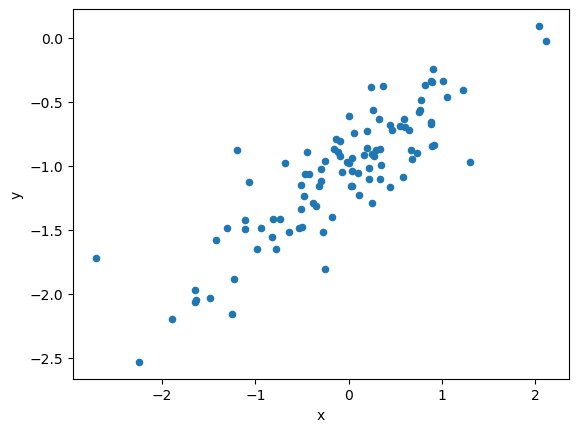

In [34]:
df13.plot.scatter('x','y')

There appears to be a strong positive linear correlation between x and y as should be expected by construction.

### Part e
Fit a least squares linear model to predict y using x. Comment
on the model obtained. How do βˆ0 and βˆ1 compare to β0 and
β1?

In [35]:
# create a dataframe
df = pd.DataFrame({'x': x, 'y': y})
design = MS(['x'])
X = design.fit_transform(df)

model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-1.0190,0.025,-40.537,0.0
x,0.4921,0.029,16.734,0.0


Coefficients B_0=-1.019 is close to our expected intercept (-1) and B_1=.4921 is close to the expected slope (0.5).

### Part f
Display the least squares line on the scatterplot obtained in (d).
Draw the population regression line on the plot, in a diferent
color. Use the legend() method of the axes to create an appropriate legend.

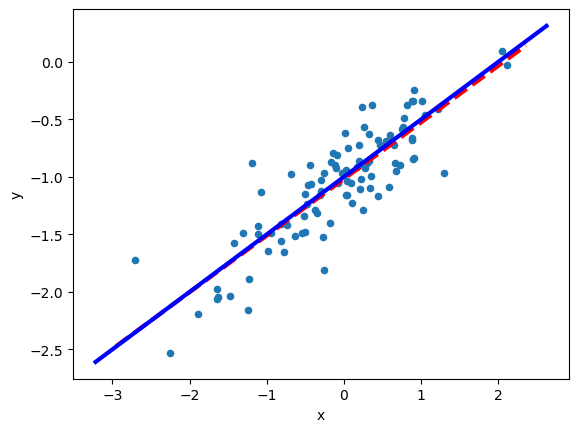

In [36]:
ax = df13.plot.scatter('x','y')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)
abline(ax,
       -1,
       0.5,
       'b',
       linewidth=3)

Population regression (true values) in blue, least squares line in dashed red.

### Part g
Now ft a polynomial regression model that predicts y using x
and x2. Is there evidence that the quadratic term improves the
model ft? Explain your answer.

In [37]:
X = MS([poly('x', degree=2)]).fit_transform(df13)
model2 = sm.OLS(y, X)
results2 = model2.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,-1.0552,0.025,-41.920,0.000
"poly(x, degree=2)[0]",4.1909,0.252,16.649,0.000
"poly(x, degree=2)[1]",-0.0131,0.252,-0.052,0.959


The p-statistic is over .95 which suggests a quadratic term does not improve the model.

### Part h
Repeat (a)–(f) after modifying the data generation process in
such a way that there is less noise in the data. The model (3.39)
should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term
" in (b). Describe your results.

In [38]:
# reduce noise from .25 to .1
eps = rng.normal(0,0.1,size=100)
y = -1 + 0.5*x + eps
# create a dataframe
df = pd.DataFrame({'x': x, 'y': y})
design = MS(['x'])
X = design.fit_transform(df)

model = sm.OLS(y, X)
results1 = model.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,-1.0162,0.009,-109.770,0.0
x,0.4987,0.011,46.046,0.0


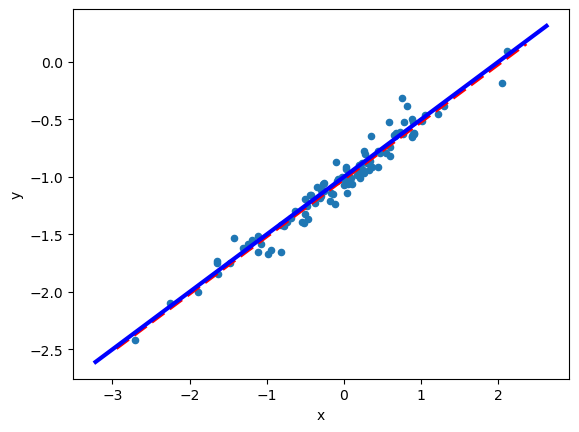

In [39]:
ax = df.plot.scatter('x','y')
abline(ax,
       results1.params[0],
       results1.params[1],
       'r--',
       linewidth=3)
abline(ax,
       -1,
       0.5,
       'b',
       linewidth=3)

With reduced noise, we get values of B_0 and B_1 closer to our actual values and the population regression and least square lines are almost identical as expected.

### Part i
Repeat (a)–(f) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term " in (b). Describe your results.

In [40]:
# increase noise from .25 to .75
eps = rng.normal(0,0.75,size=100)
y = -1 + 0.5*x + eps
# create a dataframe
df = pd.DataFrame({'x': x, 'y': y})
design = MS(['x'])
X = design.fit_transform(df)

model = sm.OLS(y, X)
results2 = model.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,-1.0069,0.066,-15.351,0.0
x,0.6102,0.077,7.952,0.0


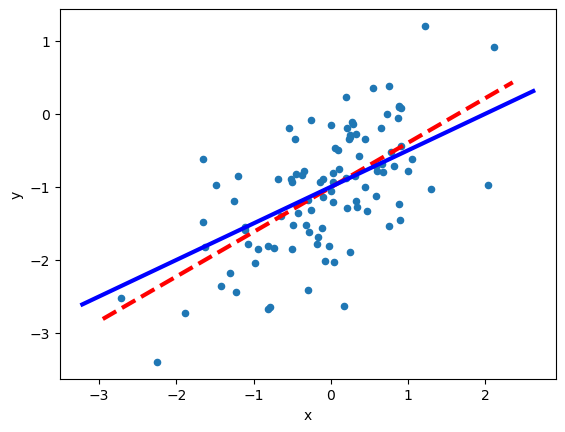

In [41]:
ax = df.plot.scatter('x','y')
abline(ax,
       results2.params[0],
       results2.params[1],
       'r--',
       linewidth=3)
abline(ax,
       -1,
       0.5,
       'b',
       linewidth=3)

With increased noise, we get values of B_0 and B_1 farther from our actual values and the population regression and least square lines are further apart as expected.

### Part j
What are the confdence intervals for β0 and β1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

In [42]:
# original data
results.conf_int(alpha = 0.05)


,0,1
intercept,-1.068891,-0.969122
x,0.433783,0.550508


In [43]:
# less noise
results1.conf_int(alpha = 0.05)

,0,1
intercept,-1.034564,-0.997822
x,0.477228,0.520215


In [44]:
# more noise
results2.conf_int(alpha = 0.05)

,0,1
intercept,-1.137033,-0.876705
x,0.457960,0.762532


The confidence intervals get smaller with less noise and larger with more noise as expected.

## Problem 15
This problem involves the Boston data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.

First load the data.

In [69]:
Boston = load_data("Boston")
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### Part a
For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.

In [74]:
y = Boston['crim']
cols = Boston.columns.drop(['crim'])
for col in cols:
    X = MS([col]).fit_transform(Boston)
    model = sm.OLS(y, X)
    results = model.fit()
    print(summarize(results))

             coef  std err       t  P>|t|
intercept  4.4537    0.417  10.675    0.0
zn        -0.0739    0.016  -4.594    0.0
             coef  std err      t  P>|t|
intercept -2.0637    0.667 -3.093  0.002
indus      0.5098    0.051  9.991  0.000
             coef  std err      t  P>|t|
intercept  3.7444    0.396  9.453  0.000
chas      -1.8928    1.506 -1.257  0.209
              coef  std err       t  P>|t|
intercept -13.7199    1.699  -8.073    0.0
nox        31.2485    2.999  10.419    0.0
              coef  std err      t  P>|t|
intercept  20.4818    3.364  6.088    0.0
rm         -2.6841    0.532 -5.045    0.0
             coef  std err      t  P>|t|
intercept -3.7779    0.944 -4.002    0.0
age        0.1078    0.013  8.463    0.0
             coef  std err       t  P>|t|
intercept  9.4993    0.730  13.006    0.0
dis       -1.5509    0.168  -9.213    0.0
             coef  std err       t  P>|t|
intercept -2.2872    0.443  -5.157    0.0
rad        0.6179    0.034  17.998    0.

All the factors seem potentially significantly significant except 'chas': the charles river dummy variable. We can try to graph a few:

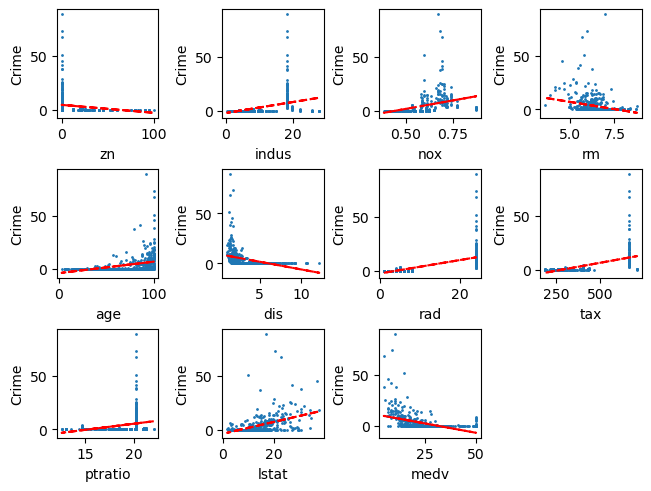

In [63]:
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

cols = Boston.columns.drop(['crim', 'chas'])

fig = plt.figure(constrained_layout=True)

for i in range(0,len(cols)):
       X = MS([cols[i]]).fit_transform(Boston)
       model = sm.OLS(y, X)
       results = model.fit()
       plt.subplot(3,4,i+1)
       plt.scatter(Boston[cols[i]],Boston.crim, s=1)
       plt.xlabel(cols[i])
       plt.ylabel('Crime')
       plt.plot(Boston[cols[i]], results.params[0]+results.params[1]*Boston[cols[i]], 'r--')

### Part b
Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H0 : βj = 0?

In [71]:
cols = Boston.columns.drop(['crim']) 
X = MS(cols).fit_transform(Boston)
model = sm.OLS(y, X)
resultsb = model.fit()
summarize(resultsb)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


Using a threshold of P <5%, we can reject the null hypothesis for: zn, dis, rad, and medv. 
- `zn`: proportion of residential land zoned for lots over 25,000
          sq.ft.
 - `dis`: weighted mean of distances to five Boston employment
          centres.
- `rad`: index of accessibility to radial highways.
- `medv`: median value of owner-occupied homes in $1000s.

### Part c
How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefcients
from (a) on the x-axis, and the multiple regression coefcients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefcient in a simple linear regression model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.

There are far fewer statistically significant factors with the multivariate analysis.

In [115]:
summaryb = summarize(resultsb)
summaryb.index[0]

y_coefs = summaryb['coef']
y_coefs = y_coefs[1:]
y_coefs
x_coefs = y_coefs.copy()

y = Boston['crim']
for i in range(0, len(x_coefs)):
    col = x_coefs.index[i]
    X = MS([col]).fit_transform(Boston)
    model = sm.OLS(y, X)
    results = model.fit()
    summary = summarize(results)
    coef = summary.iloc[1,0]
    x_coefs[i]=coef

(-2.0, 2.0)

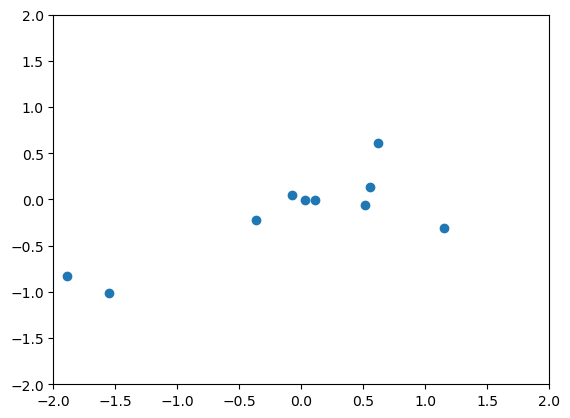

In [116]:
plt.scatter(x_coefs,y_coefs)
plt.ylim(-2, 2)
plt.xlim(-2, 2)

It looks like the coordinates of univariate and multivariate regression have a positive correlation, but the multivariate coefficients tend to be smaller in absolute value.

### Part d
Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, ft a model of the form
Y = β0 + β1X + β2X2 + β3X3 + ".


In [118]:
y = Boston['crim']
cols = Boston.columns.drop(['crim'])
for col in cols:
    X = MS([col]).fit_transform(Boston)
    model = sm.OLS(y, X)
    results = model.fit()
    X = MS([poly(col, degree=3)]).fit_transform(Boston)
    model = sm.OLS(y, X)
    results_poly = model.fit()
    print(summarize(results_poly))
    print(anova_lm(results, results_poly))

                          coef  std err      t  P>|t|
intercept               3.6135    0.372  9.709  0.000
poly(zn, degree=3)[0] -38.7498    8.372 -4.628  0.000
poly(zn, degree=3)[1]  23.9398    8.372  2.859  0.004
poly(zn, degree=3)[2] -10.0719    8.372 -1.203  0.230
   df_resid           ssr  df_diff     ss_diff         F    Pr(>F)
0     504.0  35861.672261      0.0         NaN       NaN       NaN
1     502.0  35187.114178      2.0  674.558083  4.811821  0.008512
                             coef  std err       t  P>|t|
intercept                  3.6135    0.330  10.950  0.000
poly(indus, degree=3)[0]  78.5908    7.423  10.587  0.000
poly(indus, degree=3)[1] -24.3948    7.423  -3.286  0.001
poly(indus, degree=3)[2] -54.1298    7.423  -7.292  0.000
   df_resid           ssr  df_diff      ss_diff         F        Pr(>F)
0     504.0  31186.705132      0.0          NaN       NaN           NaN
1     502.0  27661.567803      2.0  3525.137328  31.98696  8.408754e-14
                       

Most of these models seem significantly better than linear, but given the p-values for each degree, most only need to be quadratic instead of cubic for improved performanace and the cubic term may not add much.